In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px
from numpy.random import seed, randn
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, Birch, MiniBatchKMeans, SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import numpy as np

In [ ]:
output_ships = pd.read_csv('/content/output_ships.csv')
output_deaths = pd.read_csv('/content/output_deaths.csv', encoding_errors = 'replace')
passengers = pd.read_csv('/content/unique-passenger-counts-over-100-by-NZ-port-and-citizenship-year-ended-june-2019.csv')

# Deaths on cruise ships research

###Top deaths on cruise ships

In [ ]:
ship_of_death = output_deaths['ship_name']
death_ship_count = ship_of_death.value_counts()
top_10 = death_ship_count[:10]
t10 = pd.DataFrame(top_10)

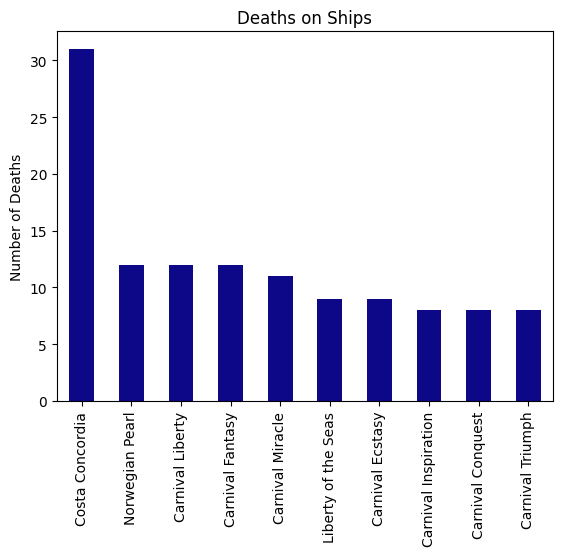

In [ ]:
t10.plot(kind = 'bar', colormap = 'plasma', legend = False, title = 'Deaths on Ships', ylabel = 'Number of Deaths')
plt.show()

## Reasons research

### Deaths timeline

In [ ]:
output_deaths['date_published'] = pd.to_datetime(output_deaths['date_published']).dt.year

In [ ]:
pivot_deaths = pd.pivot_table(data = output_deaths, index = 'date_published', columns = 'death_type', aggfunc =['count'])

count                                                  \
               death_time                                                   
death_type       accident alcohol-related disaster drowning drug-overdose   
date_published                                                              
2000                  NaN             NaN      NaN      NaN           NaN   
2001                  NaN             NaN      NaN      NaN           NaN   
2002                  NaN             NaN      NaN      NaN           0.0   
2003                  NaN             NaN      NaN      NaN           NaN   
2004                  NaN             NaN      NaN      NaN           NaN   
2005                  0.0             NaN      NaN      NaN           0.0   
2006                  0.0             NaN      NaN      0.0           NaN   
2007                  0.0             NaN      NaN      0.0           NaN   
2008                  0.0             NaN      NaN      NaN           0.0   
2009                  NaN             NaN      NaN      NaN           NaN   
2010                  0.0             NaN      NaN      NaN           0.0   
2011                  NaN             0.0      NaN      NaN           NaN   
2012                  0.0             NaN      NaN      NaN           NaN   
2013                  0.0             0.0      NaN      1.0           NaN   
2014                  0.0             NaN      2.0      0.0           NaN   
2015                  1.0             NaN      NaN      0.0           NaN   
2016                  1.0             NaN      NaN      1.0           NaN   
2017                  0.0             NaN      NaN      NaN           NaN   

                                                    ...                       \
                                                    ...  url                   
death_type     fire illness in-port missing murder  ... fire illness in-port   
date_published                                      ...                        
2000            NaN     NaN     NaN     NaN    NaN  ...  NaN     NaN     NaN   
2001            NaN     NaN     NaN     NaN    NaN  ...  NaN     NaN     NaN   
2002            NaN     0.0     NaN     NaN    NaN  ...  NaN     1.0     NaN   
2003            NaN     NaN     NaN     NaN    NaN  ...  NaN     NaN     NaN   
2004            NaN     NaN     NaN     NaN    NaN  ...  NaN     NaN     NaN   
2005            NaN     NaN     NaN     NaN    NaN  ...  NaN     NaN     NaN   
2006            0.0     0.0     NaN     NaN    0.0  ...  1.0     1.0     NaN   
2007            NaN     NaN     NaN     0.0    NaN  ...  NaN     NaN     NaN   
2008            NaN     0.0     NaN     NaN    1.0  ...  NaN     2.0     NaN   
2009            NaN     0.0     NaN     NaN    0.0  ...  NaN     3.0     NaN   
2010            NaN     0.0     0.0     0.0    0.0  ...  NaN     5.0     1.0   
2011            NaN     0.0     NaN     0.0    0.0  ...  NaN     1.0     NaN   
2012            NaN     0.0     0.0     0.0    NaN  ...  NaN     2.0     2.0   
2013            NaN     1.0     NaN     NaN    NaN  ...  NaN     5.0     NaN   
2014            NaN     0.0     NaN     0.0    0.0  ...  NaN     3.0     NaN   
2015            NaN     0.0     0.0     NaN    1.0  ...  NaN     2.0     5.0   
2016            0.0     0.0     1.0     0.0    NaN  ...  3.0     4.0     4.0   
2017            1.0     0.0     0.0     0.0    5.0  ...  1.0     3.0     2.0   

                                                                           
                                                                           
death_type     missing murder natural norovirus overboard sinking suicide  
date_published                                                             
2000               NaN    NaN     2.0       1.0       1.0     NaN     1.0  
2001               NaN    NaN     NaN       NaN       1.0     NaN     2.0  
2002               NaN    NaN     1.0       NaN       NaN     NaN     NaN  
2003               NaN    NaN   

In [ ]:
pivot_deaths_alt = pd.pivot_table(data = output_deaths, index = 'date_published', values = 'death_type', aggfunc =[len, lambda x: x.mode().iloc[0]])
pivot_deaths_alt = pivot_deaths_alt.reset_index(inplace = False)
pivot_deaths_alt.columns = [' '.join(col).strip() for col in pivot_deaths_alt.columns.values]
pivot_deaths_alt.rename(columns = {'len death_type': 'death_type_count', '<lambda> death_type':'the_most_common_type'}, inplace = True)
pivot_deaths_alt

,date_published,death_type_count,the_most_common_type
0,2000,5,natural
1,2001,3,suicide
2,2002,3,drug-overdose
3,2003,2,suicide
4,2004,9,natural
5,2005,19,natural
6,2006,39,natural
7,2007,36,natural
8,2008,27,natural
9,2009,38,natural


<Axes: xlabel='date_published', ylabel='death_type_count'>

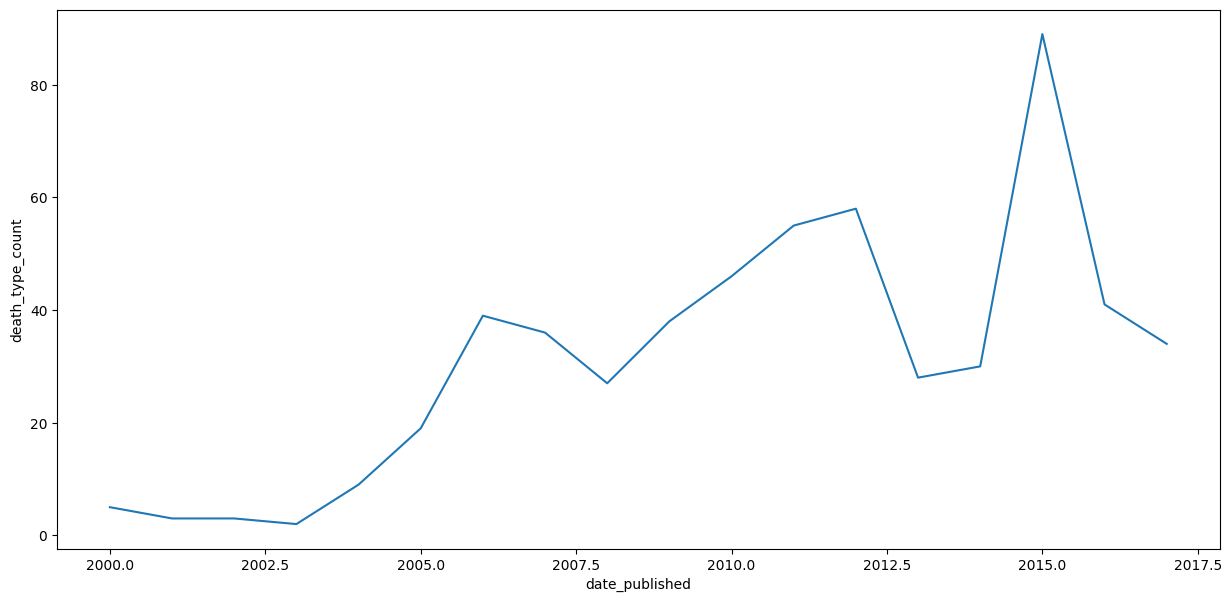

In [ ]:
plt.figure(figsize = (15, 7))

sns.lineplot(data = pivot_deaths_alt, x = 'date_published', y = 'death_type_count')

In [ ]:
pivot_deaths.columns = pivot_deaths.columns.get_level_values(2)


In [ ]:
pivot_deaths.reset_index(inplace = True)

In [ ]:
pivot_deaths[set(pivot_deaths.columns[1:].to_list())]

<ipython-input-13-b2d19c878a2e>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pivot_deaths[set(pivot_deaths.columns[1:].to_list())]


death_type,alcohol-related,alcohol-related,alcohol-related,alcohol-related,alcohol-related,alcohol-related,alcohol-related,alcohol-related,alcohol-related,alcohol-related,...,natural,natural,natural,natural,natural,natural,natural,natural,natural,natural
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,9.0,9.0,9.0,9.0,3.0,3.0,3.0,9.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,6.0,19.0,19.0,19.0,19.0,15.0,16.0,16.0,19.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,18.0,19.0,19.0,19.0,18.0,18.0,18.0,19.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,12.0,17.0,17.0,17.0,17.0,15.0,14.0,16.0,17.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,20.0,22.0,22.0,22.0,22.0,21.0,21.0,21.0,22.0


In [ ]:
#px.line(pivot_deaths, x = 'date_published', y = pivot_deaths.columns[1:].to_list())

###2015

In [ ]:
suicides_2015 = output_deaths.query('date_published == 2015 & death_type == "suicide"')
suicides_2015[suicides_2015['ship_name'].isna() == True]


,date_published,death_time,death_type,deceased_name,deceased_age,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name,ship_callsign,url
408,2015,NaN,suicide,Rosanna Rossato,75.0,female,True,False,MSC Cruises,NaN,NaN,https://www.cruiseshipdeaths.com/2015/11/11/ro...
413,2015,NaN,suicide,Shane Searle,42.0,male,True,False,P&O Cruises,NaN,NaN,https://www.cruiseshipdeaths.com/2015/10/10/sh...
414,2015,1130.0,suicide,Rajkumar Agarwal,30.0,male,True,False,NaN,NaN,NaN,https://www.cruiseshipdeaths.com/2015/10/07/ra...
421,2015,1200.0,suicide,Wendy Portman Lewis,59.0,female,True,False,Seabourn Cruises,NaN,NaN,https://www.cruiseshipdeaths.com/2015/09/11/we...
434,2015,NaN,suicide,Keith White,34.0,male,True,False,Mariposa Cruises,NaN,NaN,https://www.cruiseshipdeaths.com/2015/06/13/ke...
442,2015,NaN,suicide,Mulianto Raik,50.0,male,True,False,Star Cruises,NaN,NaN,https://www.cruiseshipdeaths.com/2015/05/13/mu...
445,2015,NaN,suicide,Patrick Plummer,NaN,male,True,False,NaN,NaN,NaN,https://www.cruiseshipdeaths.com/2015/05/04/pa...
451,2015,1130.0,suicide,Darla J Mellinger Banner Murder ����John C. Ba...,56.0,male,False,False,NaN,NaN,NaN,https://www.cruiseshipdeaths.com/2015/04/02/da...
469,2015,NaN,suicide,Larry Brown,55.0,male,True,False,NaN,NaN,NaN,https://www.cruiseshipdeaths.com/2015/03/12/la...


In [ ]:
len(suicides_2015)

18

### Gender & Ship review frist list

In [ ]:
names_list_10 = ['Costa Concordia', 'Norwegian Pearl', 'Carnival Liberty', 'Carnival Fantasy', 'Carnival Miracle',
                 'Liberty of the Seas', 'Carnival Ecstasy', 'Carnival Inspiration', 'Carnival Conquest', 'Carnival Triumph']

In [ ]:
death_ships_10 = output_deaths[output_deaths['ship_name'].isin(names_list_10)]

In [ ]:
death_ships_10.drop(['ship_callsign', 'url'], axis = 1, inplace = True)
death_ships_10 = death_ships_10.reset_index()
death_ships_10.drop('index', axis = 1, inplace = True)

<ipython-input-19-f8e2af087537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_ships_10.drop(['ship_callsign', 'url'], axis = 1, inplace = True)


''

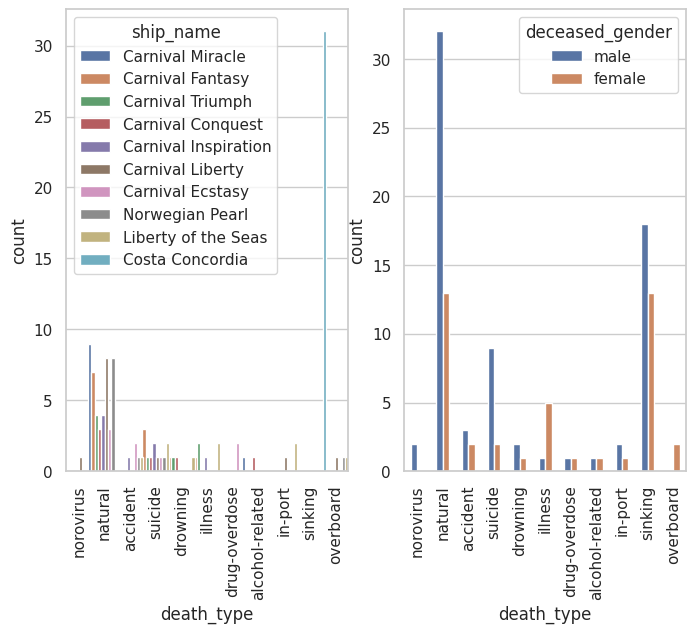

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})

sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(death_ships_10, x = 'death_type', hue = 'ship_name', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(death_ships_10, x = 'death_type', hue = 'deceased_gender', width=0.5)
plt.xticks(rotation = 90)
;

***While visualy analising the death rate graphs we can see an obviously outliying number of sinkings, which happened on Costa Concordia. Let's do a little research and maybe we will find an logical explanation for that.***
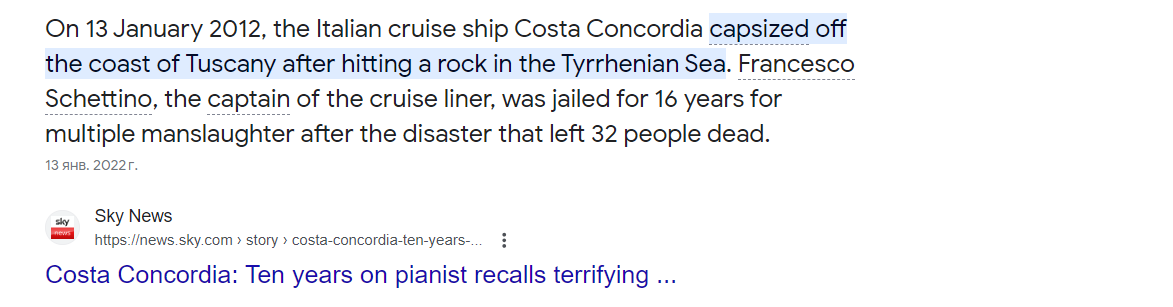

***An incompetent captain caused that disaster so let's get rid of Costa Concordia and ad another ship to our list.***

In [ ]:
names_list_10_new = ['Star Princess', 'Norwegian Pearl', 'Carnival Liberty', 'Carnival Fantasy', 'Carnival Miracle',
                 'Liberty of the Seas', 'Carnival Ecstasy', 'Carnival Inspiration', 'Carnival Conquest', 'Carnival Triumph']

In [ ]:
death_ships_10_new = output_deaths[output_deaths['ship_name'].isin(names_list_10_new)]

### Gender and Ship review new list

In [ ]:
death_ships_10_new.drop(['ship_callsign', 'url'], axis = 1, inplace = True)
death_ships_10_new = death_ships_10_new.reset_index()
death_ships_10_new.drop('index', axis = 1, inplace = True);

<ipython-input-23-13029bbf3038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_ships_10_new.drop(['ship_callsign', 'url'], axis = 1, inplace = True)


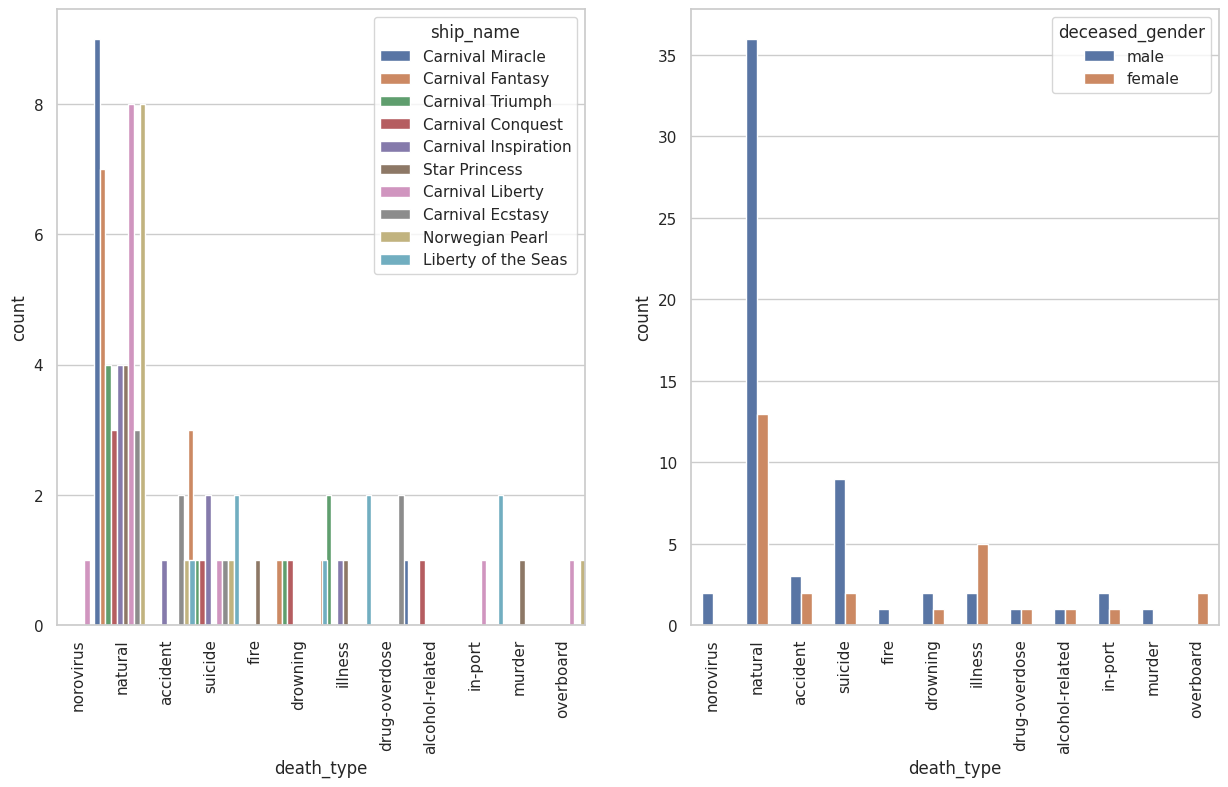

In [ ]:
plt.figure(figsize = (15,8))

sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.countplot(death_ships_10_new, x = 'death_type', hue = 'ship_name', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(death_ships_10_new, x = 'death_type', hue = 'deceased_gender', width=0.5)
plt.xticks(rotation = 90);

### Age review

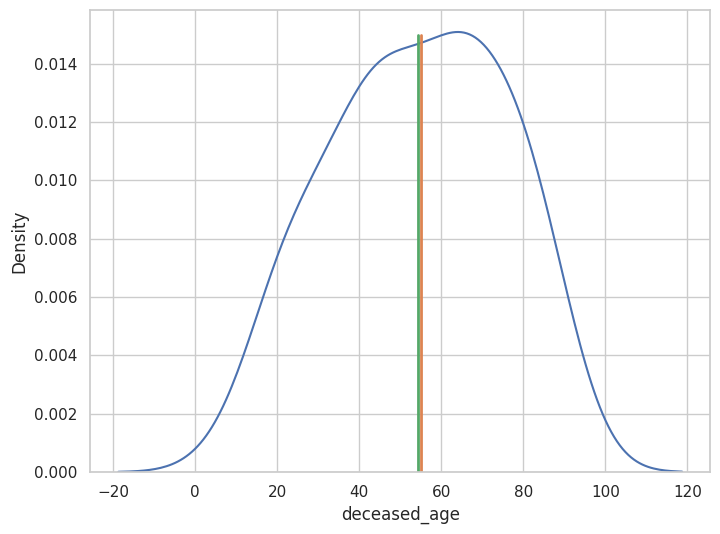

In [ ]:
sns.kdeplot(death_ships_10_new, x = 'deceased_age')
plt.plot([death_ships_10_new['deceased_age'].median(), death_ships_10_new['deceased_age'].median()], [0, 0.015], linewidth = 2)
plt.plot([death_ships_10_new['deceased_age'].mean(), death_ships_10_new['deceased_age'].mean()], [0, 0.015], linewidth = 2, color = 'g')

In [ ]:
death_pivot = pd.pivot_table(data = death_ships_10_new, values = 'deceased_age', index = 'death_type'	)

In [ ]:
death_pivot = death_pivot.reset_index(inplace=False)

In [ ]:
death_pivot

,death_type,deceased_age
0,accident,52.000000
1,alcohol-related,28.500000
2,drowning,46.000000
3,drug-overdose,32.000000
4,fire,72.000000
5,illness,59.750000
6,in-port,43.666667
7,natural,66.135135
8,norovirus,48.500000
9,overboard,32.333333


### Crew & Passenger review

In [ ]:
death_ships_10_new['is_crew'].value_counts()

False    91
True      5
Name: is_crew, dtype: int64

In [ ]:
death_ships_10_new['is_passenger'].value_counts()



True     88
False     8
Name: is_passenger, dtype: int64

In [ ]:
passengers_dead = death_ships_10_new[death_ships_10_new['is_passenger'] == True]
crew_dead = death_ships_10_new[death_ships_10_new['is_crew'] == True]

In [ ]:
death_ships_10_new[(death_ships_10_new['is_passenger'] == False) & (death_ships_10_new['is_crew'] == True)]

,date_published,death_time,death_type,deceased_name,deceased_age,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name
34,2009,NaN,natural,Andres Caraan,NaN,male,False,True,Norwegian Cruise Line,Norwegian Pearl
75,2014,NaN,murder,Lemuel Lizada,NaN,male,False,True,Princess Cruises,Star Princess
77,2015,NaN,accident,Jose Sandoval Opazo,66.0,male,False,True,Carnival Cruise Line,Carnival Ecstasy
87,2016,NaN,overboard,Natalia (Naty) Molina Valenzuela,25.0,female,False,True,Norwegian Cruise Line,Norwegian Pearl
94,2017,NaN,overboard,Norman DeCastro,39.0,NaN,False,True,Royal Caribbean International,Liberty of the Seas


In [ ]:
death_ships_10_new[(death_ships_10_new['is_passenger'] == False) & (death_ships_10_new['is_crew'] == False)]

,date_published,death_time,death_type,deceased_name,deceased_age,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name
12,2007,NaN,natural,Yvonne Mouser,NaN,NaN,False,False,Carnival Cruise Line,Carnival Ecstasy
29,2009,NaN,illness,Tore Myhra,NaN,male,False,False,Royal Caribbean International,Liberty of the Seas
31,2009,NaN,illness,Jean Young��Legionella Cruise Ship��Liberty of...,70.0,female,False,False,Royal Caribbean International,Liberty of the Seas


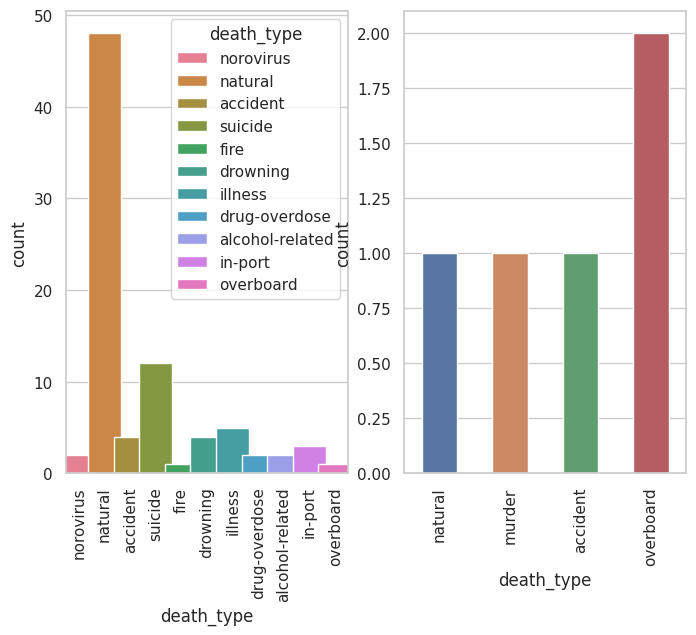

In [ ]:
plt.subplot(1, 2, 1)
sns.countplot(passengers_dead, x = 'death_type', hue = 'death_type', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(crew_dead, x = 'death_type', hue = 'death_type', width=0.5)
plt.xticks(rotation = 90);

## Summary

***Let's take the most important datasets and visualisations and try yo draw some conclusions based on them.***

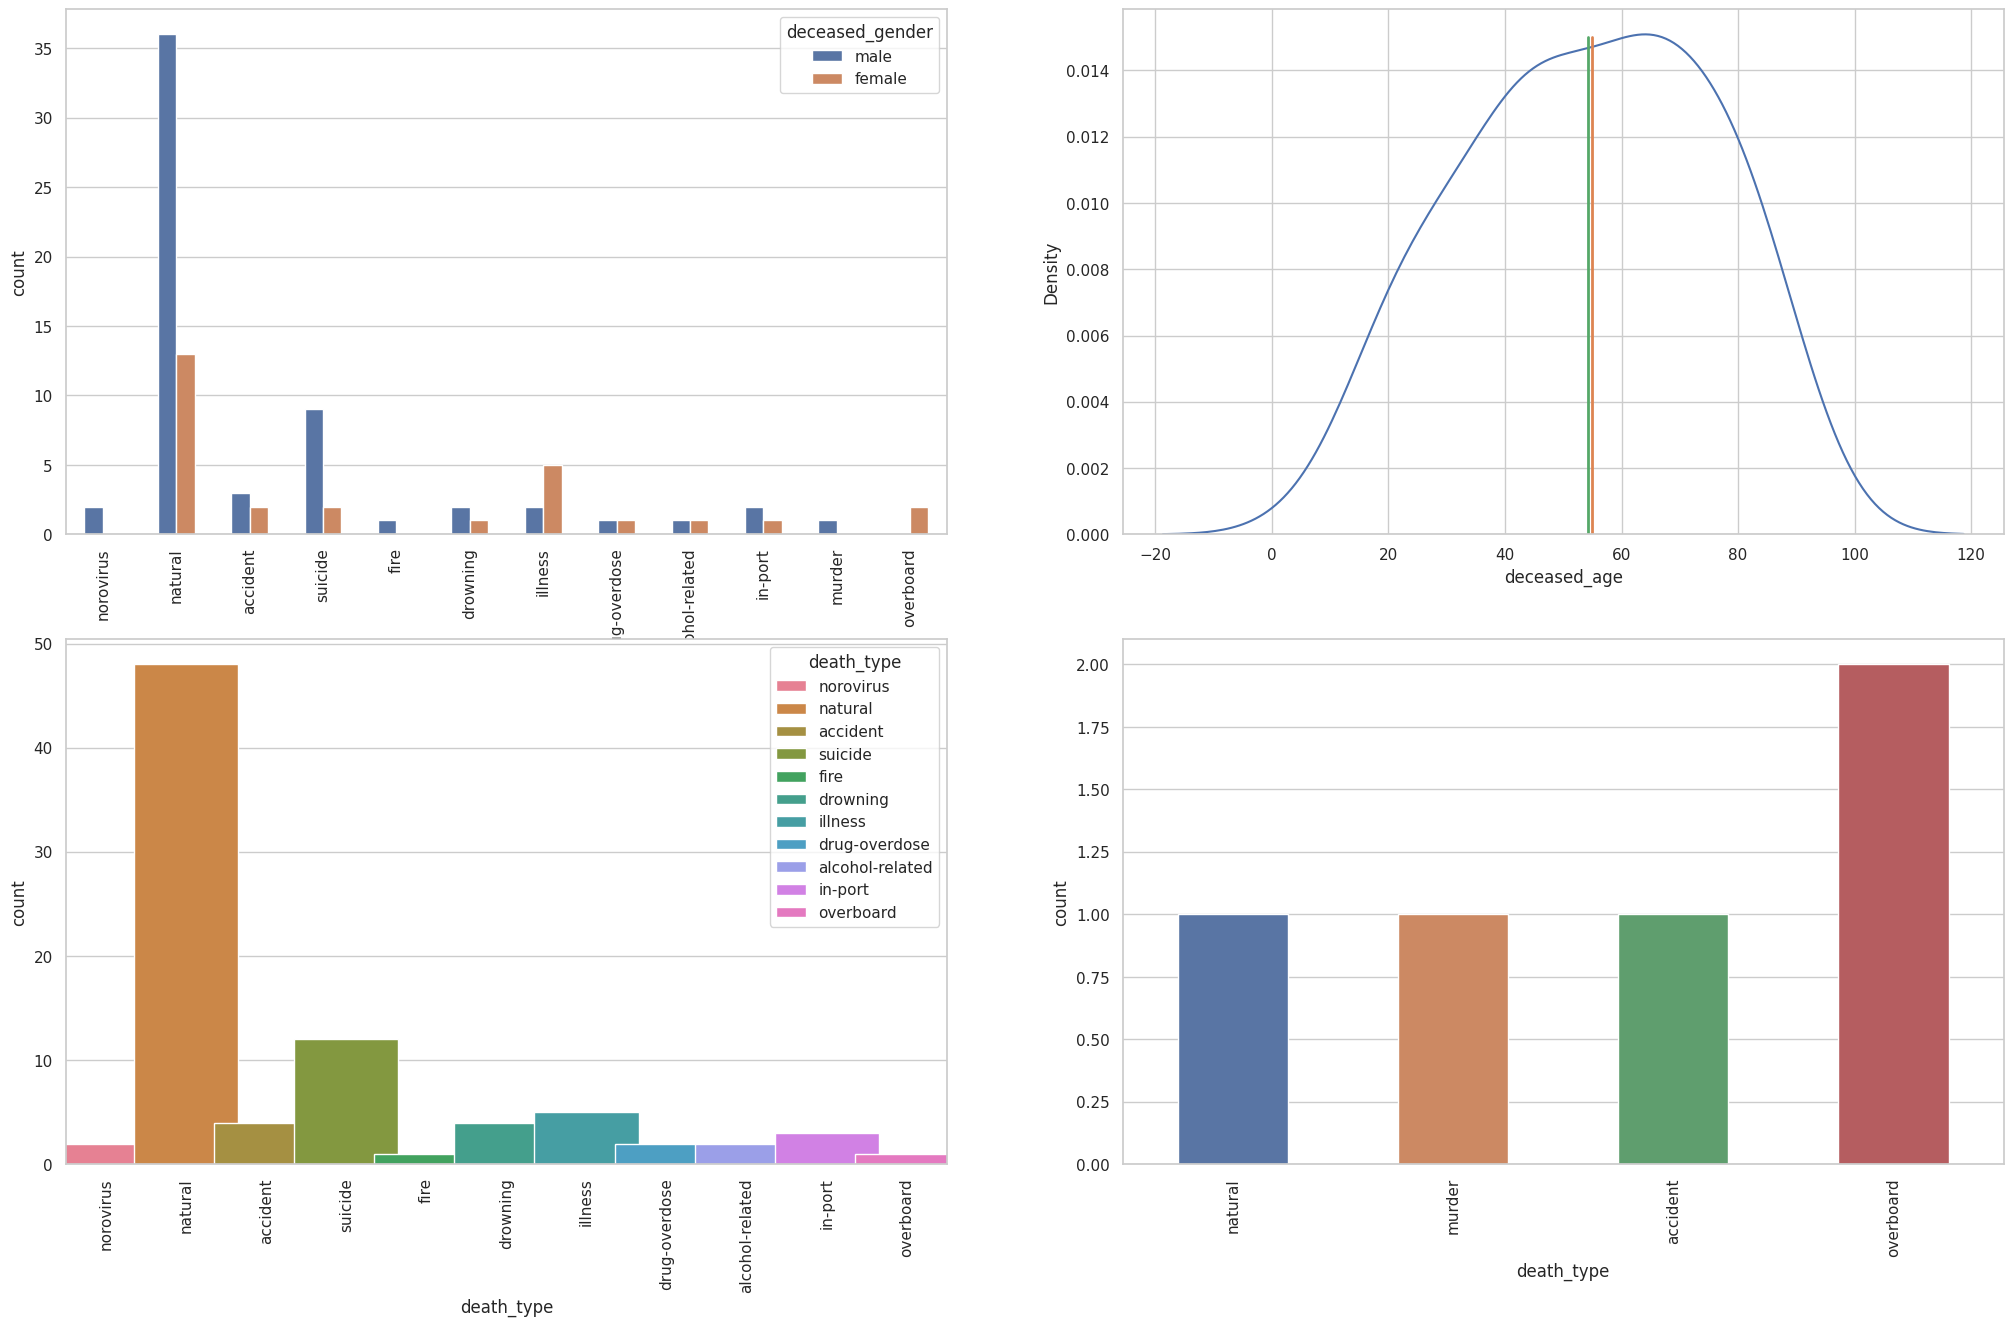

In [ ]:
plt.figure(figsize = (25,15))

plt.subplot(2, 2, 1)
sns.countplot(death_ships_10_new, x = 'death_type', hue = 'deceased_gender', width=0.5)
plt.xticks(rotation = 90);

plt.subplot(2, 2, 2)
sns.kdeplot(death_ships_10_new, x = 'deceased_age')
plt.plot([death_ships_10_new['deceased_age'].median(), death_ships_10_new['deceased_age'].median()], [0, 0.015], linewidth = 2)
plt.plot([death_ships_10_new['deceased_age'].mean(), death_ships_10_new['deceased_age'].mean()], [0, 0.015], linewidth = 2, color = 'g')

plt.subplot(2, 2, 3)
sns.countplot(passengers_dead, x = 'death_type', hue = 'death_type', width=1.3)
plt.xticks(rotation = 90)

plt.subplot(2, 2, 4)
sns.countplot(crew_dead, x = 'death_type', hue = 'death_type', width=0.5)
plt.xticks(rotation = 90);


In [ ]:
death_pivot

,death_type,deceased_age
0,accident,52.000000
1,alcohol-related,28.500000
2,drowning,46.000000
3,drug-overdose,32.000000
4,fire,72.000000
5,illness,59.750000
6,in-port,43.666667
7,natural,66.135135
8,norovirus,48.500000
9,overboard,32.333333


***So after visually analysing our plots and tabels we can first of all say that men near 60 belong to the most risky group of passengers in terms of death. Overall it's obvious that older people (both men and women) are the ones who are likely (for a lack of a better word) to die while traveling.***

In [ ]:
death_ships_10_new

,date_published,death_time,death_type,deceased_name,deceased_age,deceased_gender,is_passenger,is_crew,ship_cruise_line,ship_name
0,2005,NaN,norovirus,Jonathan Kallas,21.0,male,True,False,Carnival Cruise Line,Carnival Miracle
1,2006,NaN,natural,Gerald Johnson,NaN,male,True,False,Carnival Cruise Line,Carnival Fantasy
2,2006,NaN,natural,Roderick Anthony Watson,45.0,male,True,False,Carnival Cruise Line,Carnival Triumph
3,2006,NaN,NaN,Lee Ann ��� Suicide Overboard,NaN,female,True,False,Carnival Cruise Line,Carnival Conquest
4,2006,NaN,accident,Mario DeCurtis,NaN,male,True,False,Carnival Cruise Line,Carnival Inspiration
...,...,...,...,...,...,...,...,...,...,...
91,2016,NaN,in-port,Kenneth Wayne Thornton and Lawana Rodgers-Rose,51.0,male,True,False,Carnival Cruise Line,Carnival Liberty
92,2016,1220.0,drowning,John Douglas Herberger,56.0,male,True,False,Carnival Cruise Line,Carnival Triumph
93,2016,NaN,illness,Martin L Gross,77.0,male,True,False,Princess Cruises,Star Princess
94,2017,NaN,overboard,Norman DeCastro,39.0,NaN,False,True,Royal Caribbean International,Liberty of the Seas


##PCA

In [ ]:
deaths_analysis = output_deaths.drop(['ship_name', 'ship_callsign', 'url', 'ship_cruise_line', 'deceased_name', 'death_time'], axis = 1)
deaths_analysis['deceased_age'] = deaths_analysis.groupby('deceased_gender')['deceased_age'].transform(lambda x: x.fillna(x.mean()))
deaths_analysis['deceased_age'].fillna(deaths_analysis['deceased_age'].mean(), inplace = True)
deaths_analysis['deceased_age'] = deaths_analysis['deceased_age'].astype(int)

In [ ]:
a_equal = deaths_analysis['is_passenger'].equals(deaths_analysis['is_crew'])
a_equal

False

In [ ]:
len(deaths_analysis[(deaths_analysis['is_crew'] == True) & (deaths_analysis['is_passenger'] == False)])

36

In [ ]:
def passenger_func (df, col1, col2):
  mask = (df[col1] == False) & (df[col2] == False)
  df.loc[mask, col1] = True



In [ ]:
passenger_func(deaths_analysis, 'is_passenger', 'is_crew')

In [ ]:
deaths_analysis.drop('is_crew', axis = 1, inplace = True)

In [ ]:
pca = PCA()

In [ ]:
enc = LabelEncoder()

In [ ]:
deaths_analysis['death_type'] = enc.fit_transform(deaths_analysis['death_type'])

In [ ]:
random_choice = np.random.choice([0, 1], p = [0.4, 0.6])
deaths_analysis['deceased_gender'] = deaths_analysis['deceased_gender'].apply(lambda x: 0 if x == 'female' else (1 if x == 'male' else random_choice))

In [ ]:
deaths_analysis['deceased_gender'].value_counts()

1    330
0    232
Name: deceased_gender, dtype: int64

In [ ]:
deaths_analysis

,date_published,death_type,deceased_age,deceased_gender,is_passenger
0,2000,12,39,0,True
1,2000,14,45,0,True
2,2000,11,78,0,True
3,2000,10,53,0,True
4,2000,10,65,1,True
...,...,...,...,...,...
557,2017,9,55,0,True
558,2017,9,55,0,True
559,2017,9,55,0,True
560,2017,9,57,1,True


In [ ]:
pca.fit(deaths_analysis)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([9.19128765e-01, 4.65613789e-02, 3.34189813e-02, 7.19267064e-04,
       1.71607547e-04])

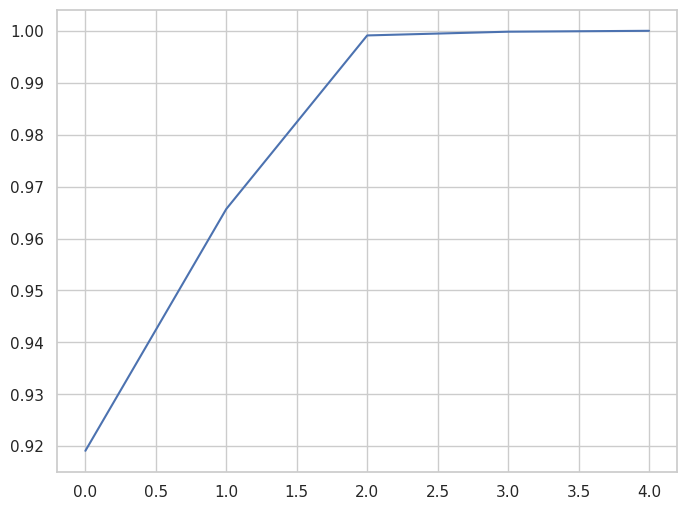

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
x_pca = pca.transform(deaths_analysis)

In [ ]:
x_pca.shape

(562, 5)

In [ ]:

x_pca

array([[ 1.63429373e+01,  1.06362758e+01,  2.43244599e+00,
         6.15497774e-01, -3.05233018e-02],
       [ 1.04205800e+01,  1.15580113e+01,  4.14213876e-01,
         6.58926761e-01,  1.55517259e-04],
       [-2.26553420e+01,  1.16920306e+01,  2.40360089e+00,
         6.96880061e-01,  7.96550804e-02],
       ...,
       [-1.75595446e-01, -5.73931426e+00, -1.16932387e+00,
         5.57027515e-01, -7.48092094e-02],
       [-2.17561046e+00, -5.65872470e+00, -1.23123917e+00,
        -4.37370231e-01, -1.02824650e-01],
       [-1.90514241e+01, -3.98724103e+00, -4.45629423e+00,
        -3.52589270e-01, -3.28982709e-02]])

In [ ]:
deaths_analysis.head()

,date_published,death_type,deceased_age,deceased_gender,is_passenger
0,2000,12,39,0,True
1,2000,14,45,0,True
2,2000,11,78,0,True
3,2000,10,53,0,True
4,2000,10,65,1,True


##New

In [ ]:
innertia_values = []
silhouette_vocab = {'KMeans' : [], 'DBSCAN' : [], 'AgglomerativeClustering' : [], 'AffinityPropagation' : [],
                     'Birch' : [], 'MiniBatchKMeans' : [], 'SpectralClustering' : [], 'GaussianMixture' : []}
key_values = range(2, 21)

In [ ]:
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
for k in key_values:
  #kmeans
  k_means = KMeans(n_clusters = k, random_state = 42)
  k_means.fit(deaths_analysis)
  silhouette_vocab['KMeans'].append(silhouette_score(deaths_analysis, k_means.labels_))
  #DBSCAN
  db = DBSCAN()
  db_preds = db.fit_predict(deaths_analysis)
  silhouette_vocab['DBSCAN'].append(silhouette_score(deaths_analysis, db_preds))
  #Agg
  agg = AgglomerativeClustering(n_clusters = k)
  agg_preds = agg.fit_predict(deaths_analysis)
  silhouette_vocab['AgglomerativeClustering'].append(silhouette_score(deaths_analysis, agg_preds))
  #Aff
  aff = AffinityPropagation()
  aff_preds = aff.fit_predict(deaths_analysis)
  silhouette_vocab['AffinityPropagation'].append(silhouette_score(deaths_analysis, aff_preds))
  #Birch
  br = Birch(n_clusters = k, threshold = 1)
  br_preds = br.fit_predict(deaths_analysis)
  silhouette_vocab['Birch'].append(silhouette_score(deaths_analysis, br_preds))
  #MBKM
  mbkm = MiniBatchKMeans(n_clusters = k, batch_size = 20)
  mbkm_preds = mbkm.fit_predict(deaths_analysis)
  silhouette_vocab['MiniBatchKMeans'].append(silhouette_score(deaths_analysis, mbkm_preds))
  #SpectralClustering
  spect = SpectralClustering(n_clusters = k, affinity = 'nearest_neighbors')
  spect_preds = spect.fit_predict(deaths_analysis)
  silhouette_vocab['SpectralClustering'].append(silhouette_score(deaths_analysis, spect_preds))
  #GM
  gaus = GaussianMixture(n_components = k, random_state = 42)
  gaus_preds = gaus.fit_predict(deaths_analysis)
  silhouette_vocab['GaussianMixture'].append(silhouette_score(deaths_analysis, gaus_preds))




In [ ]:
silhouette_vocab

{'KMeans': [0.52998235534309,
  0.5261320679012857,
  0.4703199363824074,
  0.43658726576087836,
  0.3783740526692256,
  0.3546714128602988,
  0.35717942345830134,
  0.3302420017894141,
  0.3306053579824382,
  0.3268831969713335,
  0.3113847324309754,
  0.3122739106473478,
  0.28920811803923,
  0.3119719627994314,
  0.31112943585470804,
  0.30432311341901164,
  0.3019735878927122,
  0.3108096930917762,
  0.31834783355153357],
 'DBSCAN': [-0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877,
  -0.33572499409140877],
 'AgglomerativeClustering': [0.5274944991538331,
  0.49156424714881325,
  0.4394927914423656,
  0.41247

In [ ]:
deaths_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   date_published   562 non-null    int64
 1   death_type       562 non-null    int64
 2   deceased_age     562 non-null    int64
 3   deceased_gender  562 non-null    int64
 4   is_passenger     562 non-null    bool 
dtypes: bool(1), int64(4)
memory usage: 18.2 KB


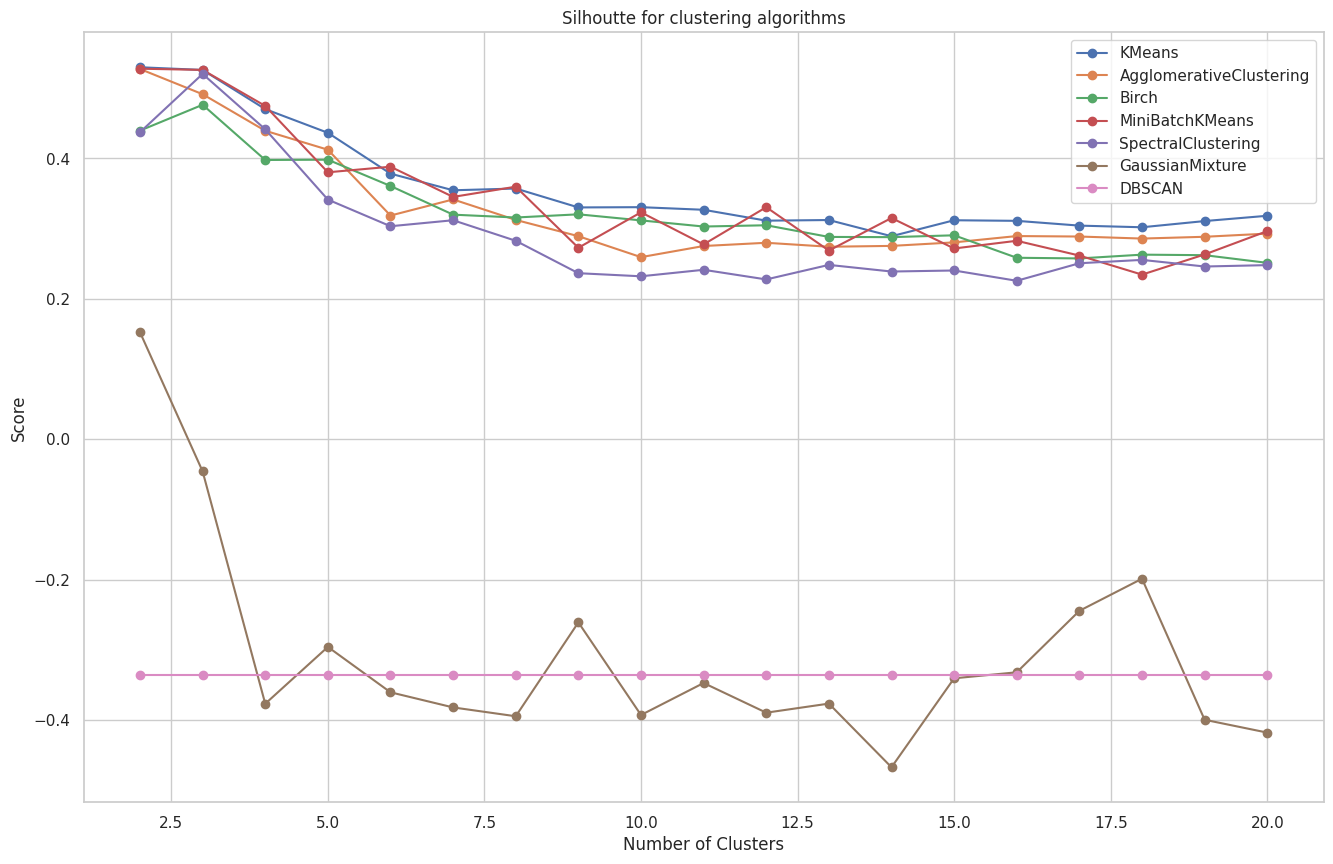

In [ ]:
plt.figure(figsize = (16, 10))
modules = {'KMeans' : 'o',
           'AgglomerativeClustering' : 'o',
           'Birch' : 'o',
           'MiniBatchKMeans' : 'o',
           'SpectralClustering' : 'o',
           'GaussianMixture' : 'o',
           'DBSCAN' : 'o'
           }
for model, style in modules.items():
  plt.plot(key_values, silhouette_vocab[model], marker = style, label = model)

plt.title('Silhoutte for clustering algorithms')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()


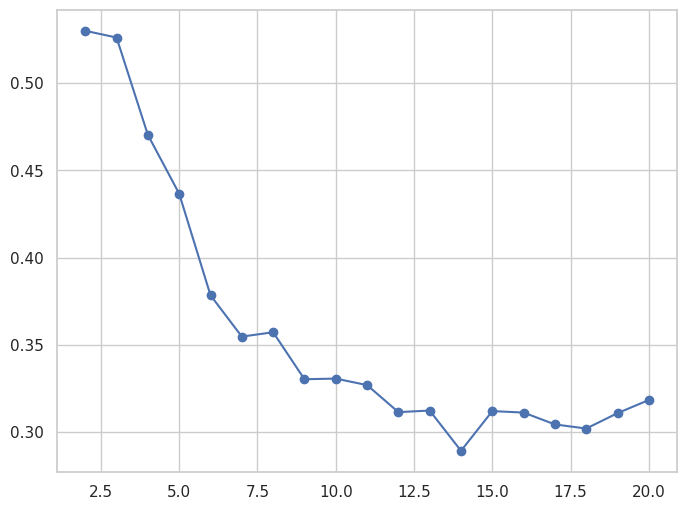

In [ ]:
plt.plot(key_values, silhouette_vocab['KMeans'], marker='o', label='KMeans')

In [ ]:
deaths_analysis.head()

,date_published,death_type,deceased_age,deceased_gender,is_passenger
0,2000,12,39,0,True
1,2000,14,45,0,True
2,2000,11,78,0,True
3,2000,10,53,0,True
4,2000,10,65,1,True


In [ ]:
  k_means = KMeans(n_clusters = 3, random_state = 42)
  k_means.fit(deaths_analysis)

KMeans(n_clusters=3, random_state=42)

In [ ]:
deaths_analysis['k_means'] = k_means.labels_

In [ ]:
deaths_analysis

,date_published,death_type,deceased_age,deceased_gender,is_passenger,k_means
0,2000,12,39,0,True,0
1,2000,14,45,0,True,1
2,2000,11,78,0,True,2
3,2000,10,53,0,True,1
4,2000,10,65,1,True,1
...,...,...,...,...,...,...
557,2017,9,55,0,True,1
558,2017,9,55,0,True,1
559,2017,9,55,0,True,1
560,2017,9,57,1,True,1


<Axes: xlabel='k_means', ylabel='count'>

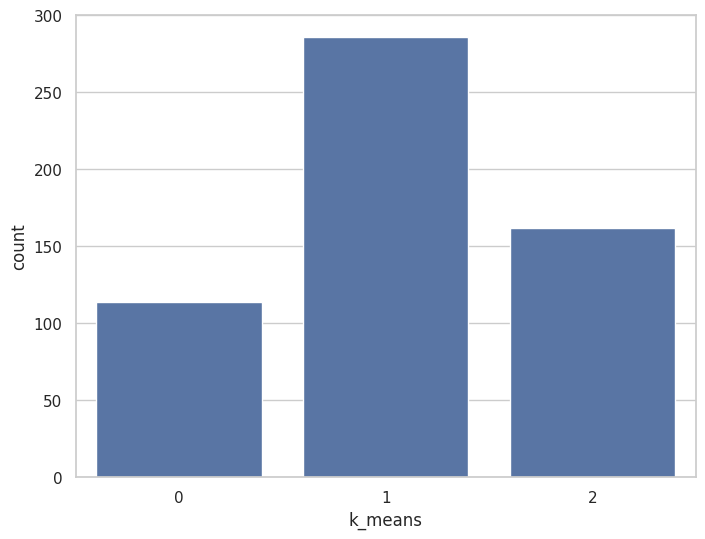

In [ ]:
sns.countplot(x = deaths_analysis['k_means'])

In [ ]:
death_0 = deaths_analysis[deaths_analysis['k_means'] == 0]
death_1 = deaths_analysis[deaths_analysis['k_means'] == 1]
death_2 = deaths_analysis[deaths_analysis['k_means'] == 2]
death_0

,date_published,death_type,deceased_age,deceased_gender,is_passenger,k_means
0,2000,12,39,0,True,0
5,2001,14,30,1,True,0
7,2001,14,19,1,True,0
10,2002,6,21,1,True,0
12,2003,14,35,0,True,0
...,...,...,...,...,...,...
508,2016,3,8,1,True,0
511,2016,12,33,0,True,0
525,2016,7,32,0,True,0
530,2017,9,39,0,True,0


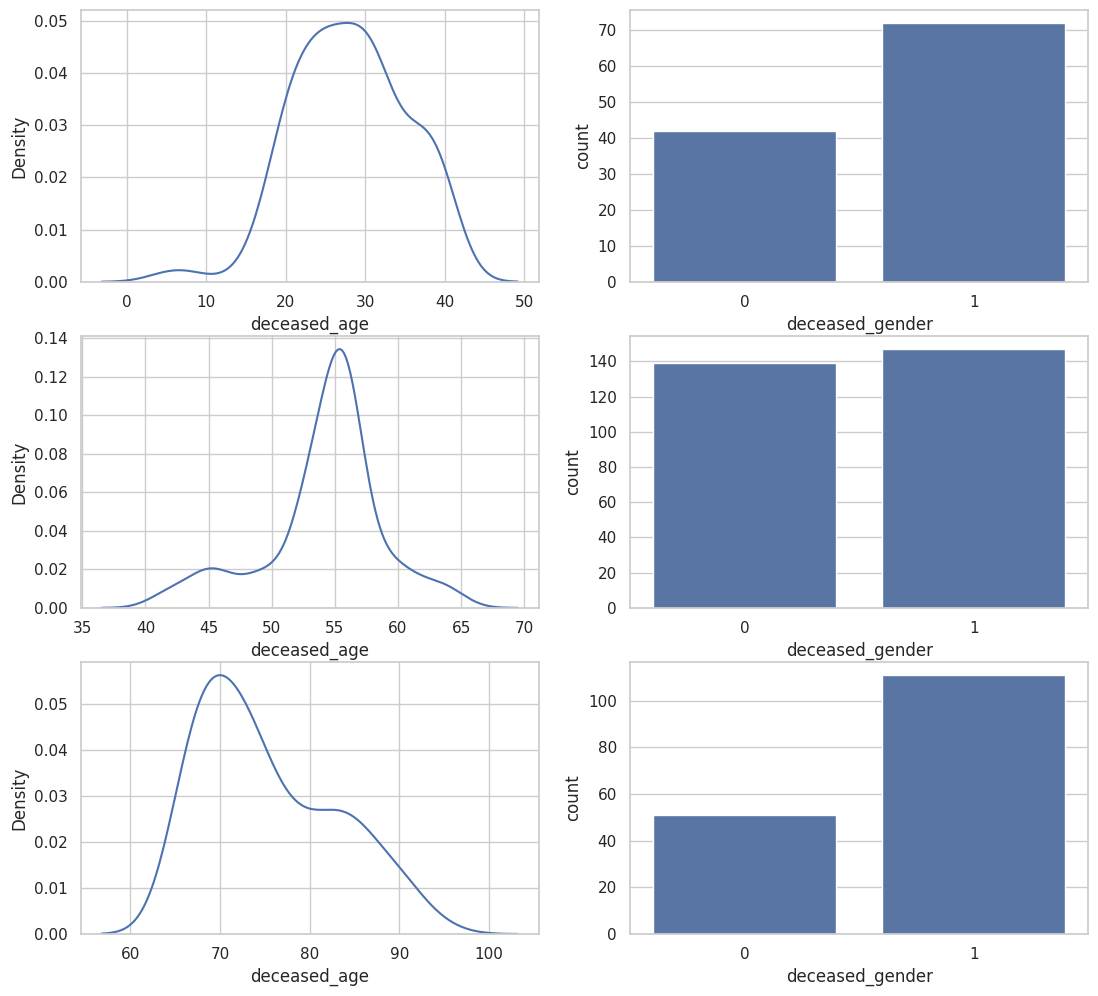

In [ ]:
plt.figure(figsize = (13, 12))

plt.subplot(321)

sns.kdeplot(x = death_0['deceased_age'])

plt.subplot(322)

sns.countplot(x = death_0['deceased_gender'])

plt.subplot(323)

sns.kdeplot(x = death_1['deceased_age'])

plt.subplot(324)

sns.countplot(x = death_1['deceased_gender'])

plt.subplot(325)

sns.kdeplot(x = death_2['deceased_age'])

plt.subplot(326)

sns.countplot(x = death_2['deceased_gender']);

In [ ]:
alpha = 0.05
tstatistics, pvalue = st.ttest_ind(death_0['deceased_age'], death_1['deceased_age'])
print(tstatistics, pvalue)
if pvalue < alpha:
  print('Rejecting the null hypothesis, means of these two groups are different')
else:
  print('We can not reject the null hypothesis, there is no statistical difference between groups')

-43.35184880805583 7.765453088966889e-153
Rejecting the null hypothesis, means of these two groups are different


In [ ]:
alpha = 0.05
tstatistics, pvalue = st.ttest_ind(death_1['deceased_age'], death_2['deceased_age'])
print(tstatistics, pvalue)
if pvalue < alpha:
  print('Rejecting the null hypothesis, means of these two groups are different')
else:
  print('We can not reject the null hypothesis, there is no statistical difference between groups')

-36.729546948842234 6.036942112092618e-137
Rejecting the null hypothesis, means of these two groups are different


In [ ]:
alpha = 0.05
tstatistics, pvalue = st.ttest_ind(death_0['deceased_age'], death_2['deceased_age'])
print(tstatistics, pvalue)
if pvalue < alpha:
  print('Rejecting the null hypothesis, means of these two groups are different')
else:
  print('We can not reject the null hypothesis, there is no statistical difference between groups')

-52.47985535361807 5.674440368086628e-145
Rejecting the null hypothesis, means of these two groups are different


In [ ]:
deaths_analysis.sort_values(by = 'date_published', inplace = True)

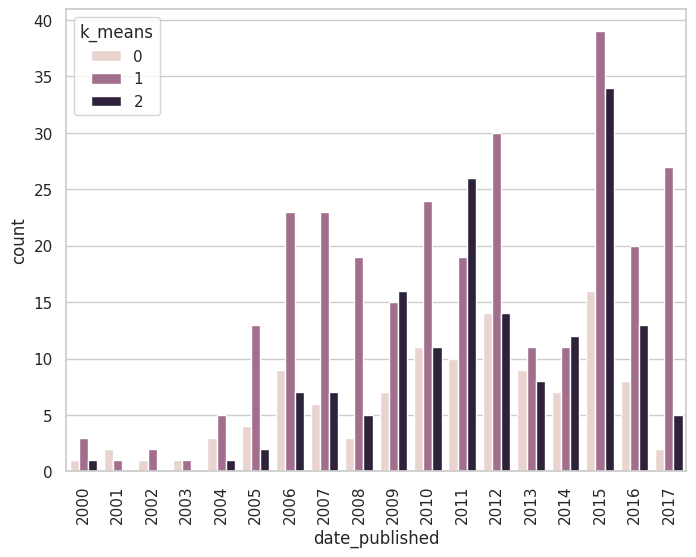

In [ ]:
sns.countplot(x = deaths_analysis['date_published'], hue = deaths_analysis['k_means'])
plt.xticks(rotation = 90);

<Axes: xlabel='deceased_gender', ylabel='count'>

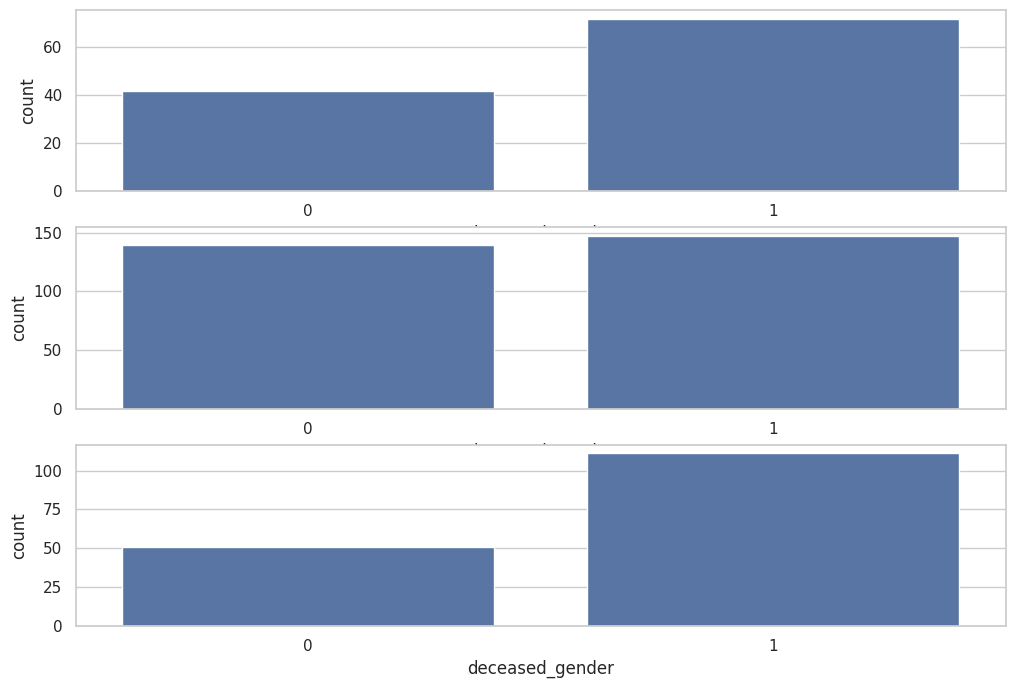

In [ ]:
plt.figure(figsize = (12, 8))



plt.subplot(311)

sns.countplot(x = death_0['deceased_gender'])

plt.subplot(312)

sns.countplot(x = death_1['deceased_gender'])

plt.subplot(313)

sns.countplot(x = death_2['deceased_gender'])